In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in excels to dataframes
df_recipients = pd.read_excel('nsf20301-tab001.xlsx',header = 3)
df_recipients_detail = pd.read_excel('nsf20301-tab014.xlsx',header = [3,4])
# df_graduation_year = pd.read_excel('nsf20301-tab031.xlsx',header = 3)
# df_salary_2018 = pd.read_excel('nsf20301-tab048.xlsx',header = [3,4])
# df_plan = pd.read_excel('nsf20301-tab044.xlsx',header = 3)
# df_plan_2018 = pd.read_excel('nsf20301-tab055.xlsx',header = 3)
# df_engineer_2018 = pd.read_excel('nsf20301-tab064.xlsx',header = 3)P
# df_engineer_plan_2018 = pd.read_excel('nsf20301-tab065.xlsx',header = 3)

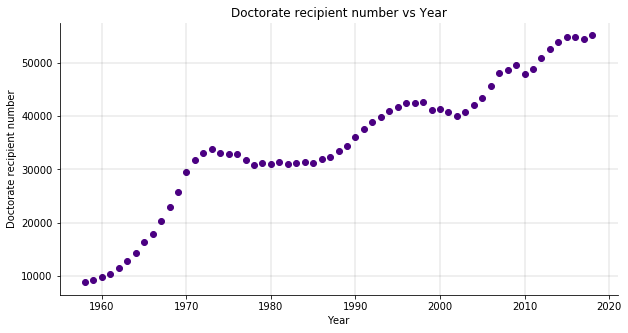

In [6]:
# PhD recipients change with time
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df_recipients['Year'], df_recipients['Doctorate recipients'], c='indigo')
ax.set_xlabel('Year')
ax.set_ylabel('Doctorate recipient number')
ax.set_title('Doctorate recipient number vs Year')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color = 'black', linestyle = '-', linewidth = 0.25, alpha = 0.5)
plt.savefig('doctorate recipients number.png')

In [26]:
print(df_recipients[['Year', 'Doctorate recipients']])

    Year  Doctorate recipients
0   1958                  8773
1   1959                  9213
2   1960                  9733
3   1961                 10413
4   1962                 11500
..   ...                   ...
56  2014                 53989
57  2015                 54889
58  2016                 54798
59  2017                 54559
60  2018                 55195

[61 rows x 2 columns]


In [8]:
# dig into the PhD recipients change with time 
df_recipients_detail.head()

Field of study and sex   1988           1993           1998           2003  \
      Unnamed: 0_level_1 Number Percent Number Percent Number Percent Number   
0            All fieldsa  33496   100.0  39505   100.0  42475   100.0  40762   
1                   Male  21677    64.7  24384    61.7  24628    58.0  22256   
2                 Female  11819    35.3  15121    38.3  17847    42.0  18506   
3         Life sciencesb   6222   100.0   7416   100.0   8590   100.0   8506   
4                   Male   3935    63.2   4312    58.1   4682    54.5   4398   

            2008           2013           2018          
  Percent Number Percent Number Percent Number Percent  
0   100.0  48765   100.0  52691   100.0  55166   100.0  
1    54.6  26271    53.9  28326    53.8  29798    54.0  
2    45.4  22494    46.1  24365    46.2  25368    46.0  
3   100.0  11082   100.0  12204   100.0  12773   100.0  
4    51.7   5223    47.1   5492    45.0   5659    44.3

In [9]:
# Get rid of the percentage and save to df_recipients_temp
years = ['1988', '1993', '1998', '2003', '2008', '2013', '2018']
df_recipients_temp = pd.DataFrame(columns = years)

for year, i in zip(years, range(1,15,2)):
    df_recipients_temp[year] = df_recipients_detail[df_recipients_detail.columns[i]]
df_recipients_temp['Field and sex'] = df_recipients_detail[df_recipients_detail.columns[0]]

df_recipients_temp.set_index('Field and sex', inplace = True)
df_recipients_temp.head()

,1988,1993,1998,2003,2008,2013,2018
Field and sex,,,,,,,
All fieldsa,33496,39505,42475,40762,48765,52691,55166
Male,21677,24384,24628,22256,26271,28326,29798
Female,11819,15121,17847,18506,22494,24365,25368
Life sciencesb,6222,7416,8590,8506,11082,12204,12773
Male,3935,4312,4682,4398,5223,5492,5659


In [10]:
# create a dataframe about PhD recipients on different majors
df_recipients_field = df_recipients_temp.drop(index = ['Male', 'Female'])
df_recipients_field.rename(index = {'All fieldsa':'All fields', 'Life sciencesb':'Life sciences', 'Otherc':'Other'}, inplace = True)
df_recipients_field = df_recipients_field.T
df_recipients_field.columns.name = None
df_recipients_field.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,All fields,Life sciences,Physical sciences and earth sciences,Mathematics and computer sciences,Psychology and social sciences,Engineering,Education,Humanities and arts,Other
1988,33496,6222,3986,1264,6016,4186,6361,3570,1891
1993,39505,7416,4354,2004,6825,5619,6669,4385,2233
1998,42475,8590,4544,2094,7359,5884,6552,5343,2109
2003,40762,8506,3971,1859,7098,5279,6651,5272,2126
2008,48765,11082,4945,3186,7635,7860,6560,4736,2761


In [11]:
# function to prepare dataframe for plot
def preparation(df):
    df.drop(index = [i for i in range(0, 27) if i not in range(0, 27, 3)], inplace = True)
    df.set_index('Field and sex', inplace = True)
    df_trans = df.transpose().copy()
    df_trans.columns.name = None
    df_trans.rename(columns = {'All fieldsa':'All fields', 'Life sciencesb':'Life sciences', 'Otherc':'Other'}, inplace = True)
    print(df_trans.shape)
    return df_trans

In [12]:
# create a dataframe about male PhD recipients on different majors
df_recipients_male = df_recipients_temp.copy()
df_recipients_male.reset_index(inplace = True)
for i in range(0, 27, 3):
    for col in df_recipients_male.columns[1:]:
        df_recipients_male.loc[i, col] = df_recipients_male.loc[i+1, col]
        
df_recipients_male = preparation(df_recipients_male)
df_recipients_male.head()

(7, 9)


,All fields,Life sciences,Physical sciences and earth sciences,Mathematics and computer sciences,Psychology and social sciences,Engineering,Education,Humanities and arts,Other
1988,21677,3935,3300,1087,3288,3900,2847,2080,1240
1993,24384,4312,3432,1602,3421,5097,2748,2398,1374
1998,24628,4682,3429,1638,3350,5111,2421,2794,1203
2003,22256,4398,2866,1419,3145,4368,2256,2663,1141
2008,26271,5223,3505,2353,3171,6167,2158,2308,1386


In [13]:
# create a dataframe about female PhD recipients on different majors
df_recipients_female = df_recipients_temp.copy()
df_recipients_female.reset_index(inplace = True)
for i in range(0, 27, 3):
    for col in df_recipients_female.columns[1:]:
        df_recipients_female.loc[i, col] = df_recipients_female.loc[i+2, col]
        
df_recipients_female = preparation(df_recipients_female)
df_recipients_female.head()

(7, 9)


,All fields,Life sciences,Physical sciences and earth sciences,Mathematics and computer sciences,Psychology and social sciences,Engineering,Education,Humanities and arts,Other
1988,11819,2287,686,177,2728,286,3514,1490,651
1993,15121,3104,922,402,3404,522,3921,1987,859
1998,17847,3908,1115,456,4009,773,4131,2549,906
2003,18506,4108,1105,440,3953,911,4395,2609,985
2008,22494,5859,1440,833,4464,1693,4402,2428,1375


In [14]:
# create a dataframe on male/female PhD recipients on different majors
df_recipients_sex = df_recipients_temp.copy()
df_recipients_sex.reset_index(inplace = True)
for index in range(0, 26, 3):
    for col in df_recipients_sex.columns[1:]:
        df_recipients_sex.loc[index, col] = df_recipients_sex.loc[index + 1, col] / df_recipients_sex.loc[index + 2, col]

df_recipients_sex = preparation(df_recipients_sex)
df_recipients_sex.head()

(7, 9)


,All fields,Life sciences,Physical sciences and earth sciences,Mathematics and computer sciences,Psychology and social sciences,Engineering,Education,Humanities and arts,Other
1988,1.834081,1.720595,4.810496,6.141243,1.205279,13.636364,0.810188,1.395973,1.904762
1993,1.612592,1.389175,3.722343,3.985075,1.004994,9.764368,0.700842,1.206844,1.599534
1998,1.379952,1.198055,3.075336,3.592105,0.835620,6.611902,0.586057,1.096116,1.327815
2003,1.202637,1.070594,2.593665,3.225000,0.795598,4.794731,0.513311,1.020698,1.158376
2008,1.167911,0.891449,2.434028,2.824730,0.710349,3.642646,0.490232,0.950577,1.008000


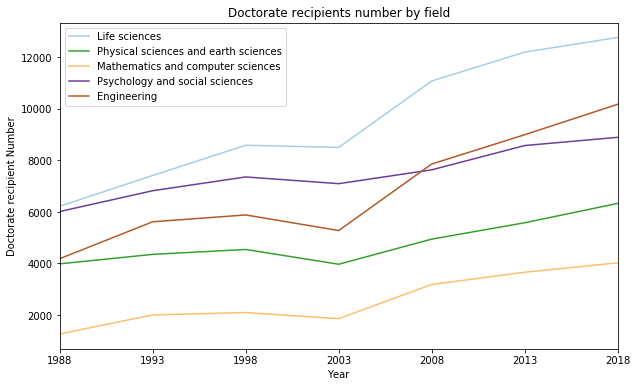

In [23]:
# plot PhD recipients number regarding to field
fig2 = plt.figure(figsize = (10,6))
ax5 = fig2.add_subplot(111)
df_recipients_field.plot(kind = 'line', ax = ax5, y = df_recipients_field.columns[1:6], colormap = 'Paired')
ax5.set_title('Doctorate recipients number by field')
ax5.set_xlabel("Year")
ax5.set_ylabel('Doctorate recipient Number')
plt.savefig('Doctorate recipients number by field.png')

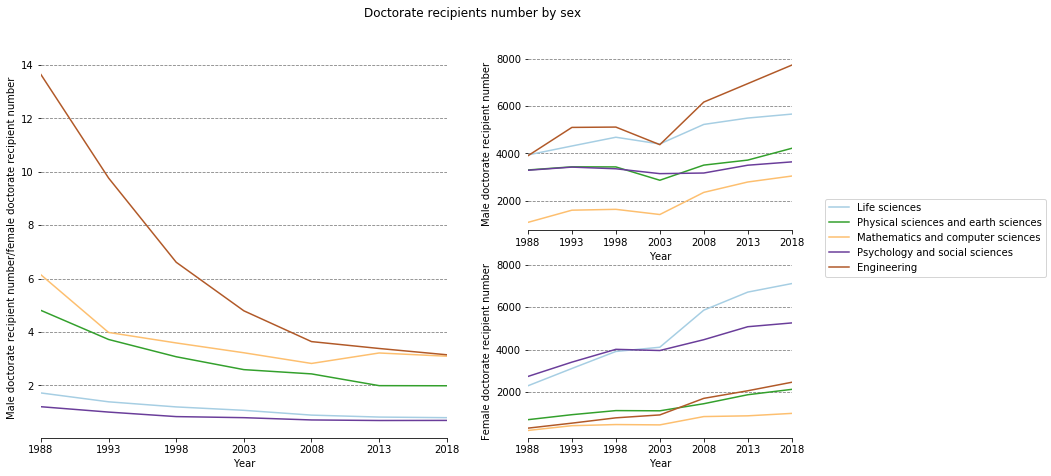

In [24]:
# plot PhD recipients number regarding to sex
fig = plt.figure(figsize = (16,7))
ax1 = fig.add_subplot(121)
ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)
df_recipients_female.plot(kind = 'line', y = df_recipients_female.columns[1:6],ax = ax4, colormap = 'Paired', legend = False)
df_recipients_male.plot(kind = 'line', y = df_recipients_male.columns[1:6],ax = ax3, colormap = 'Paired', legend = False)
df_recipients_sex.plot(kind = 'line', ax = ax1, y = df_recipients_sex.columns[1:6], colormap = 'Paired', legend = False)
handles, labels = ax1.get_legend_handles_labels()
pos3 = ax3.get_position()
pos4 = ax4.get_position()
ax3.set_position([pos3.x0, pos3.y0, pos3.width*0.65, pos3.height])
ax4.set_position([pos4.x0, pos4.y0, pos3.width*0.65, pos3.height])
fig.legend(handles, labels, loc = 'right')
fig.suptitle('Doctorate recipients number by sex', )
ax4.set_xlabel("Year")
ax4.set_ylabel('Female doctorate recipient number')
ax3.set_xlabel("Year")
ax3.set_ylabel('Male doctorate recipient number')
ax1.set_xlabel("Year")
ax1.set_ylabel('Male doctorate recipient number/female doctorate recipient number')

def changestype(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(color = 'black', linestyle = '--', linewidth = 0.8, axis = 'y', alpha = 0.5)
    
ax3.set_yticks([2000, 4000, 6000, 8000])
ax4.set_yticks([2000, 4000, 6000, 8000])
changestype(ax1)
changestype(ax3)
changestype(ax4)
plt.savefig('Male-female.png')